In [895]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [896]:
%pip install astroML


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [897]:
def measure_accuracy(negative_class, positive_class, df):
    """
    Measure the accuracy of a classifier by calculating the precision, recall, and F1 score.
    """
    # Count of true positive (TP)
    tp = df[(df['type'] == positive_class) & (df['InsideBall'] == True)]['type'].count()

    # Count of false negative (FN)
    fn = df[(df['type'] == positive_class) & (df['InsideBall'] == False)]['type'].count()

    # Count of true negative (TN)
    tn = df[(df['type'] == negative_class) & (df['InsideBall'] == False)]['type'].count()

    # Count of false positive (FP)
    fp = df[(df['type'] == negative_class) & (df['InsideBall'] == True)]['type'].count()

    # Calculate precision, recall, and F1 score
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Create a table
    table_data = {
        'Metric': ['True Positive (TP)', 'False Negative (FN)', 'True Negative (TN)', 'False Positive (FP)', 'Precision', 'Recall', 'F1 Score'],
        'Count': [tp, fn, tn, fp, precision, recall, f1_score]
    }

    table_df = pd.DataFrame(table_data)

    # Display the table
    return table_df

In [898]:
from astroML.datasets import fetch_rrlyrae_mags

data = fetch_rrlyrae_mags()
# number of objects in dataset

In [899]:
data = data.byteswap().newbyteorder()

df = pd.DataFrame(data)
display(df)

,__SIG2010_,Type,Per,uAmp,T0_u,gAmp,T0_g,rAmp,T0_r,iAmp,...,RAJ2000,DEJ2000,Ar,Dist,umag,gmag,rmag,imag,zmag,Vmag
0,4099,b'ab',0.641754,0.534608,51075.274714,0.563839,51075.288902,0.398326,51075.295112,0.317851,...,0.935679,1.115859,0.089,17.750000,18.134001,16.989000,16.777000,16.702999,16.684999,16.846001
1,13350,b'ab',0.547987,1.029445,54025.330112,1.093322,54025.326856,0.801720,54025.326474,0.642111,...,0.283437,1.178522,0.080,24.770000,18.839001,17.679001,17.544001,17.497000,17.500999,17.570000
2,15927,b'ab',0.612263,0.651579,53680.222485,0.697439,53680.229439,0.486554,53680.226214,0.368674,...,3.254658,-0.584066,0.090,29.120001,19.288000,18.058001,17.858999,17.792000,17.780001,17.921000
3,20406,b'ab',0.631853,0.553247,54000.280528,0.586784,54000.292109,0.426846,54000.276631,0.342734,...,3.244369,0.218891,0.088,9.130000,16.715000,15.543000,15.336000,15.286000,15.276000,15.403000
4,21992,b'ab',0.625880,1.109322,53698.245218,1.139930,53698.245256,0.849551,53698.243534,0.661144,...,4.315354,1.054582,0.077,7.350000,16.186001,15.040000,14.909000,14.864000,14.853000,14.932000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,4956681,b'ab',0.499544,1.079098,53272.486302,1.304108,53272.501031,0.971932,53272.495204,0.730201,...,58.700931,1.228830,1.051,36.880001,19.476000,18.513000,18.454000,18.480000,18.504999,18.434000
479,4983075,b'ab',0.646700,0.443980,54064.376360,0.487079,54064.399463,0.339135,54064.415166,0.278196,...,57.156605,0.134676,0.527,29.150000,19.114000,18.054001,17.868999,17.818001,17.841999,17.923000
480,4984662,b'ab',0.636863,0.565909,53994.452735,0.599289,53994.470683,0.464574,53994.472022,0.359037,...,57.128875,-0.389138,0.584,39.049999,19.745001,18.701000,18.489000,18.454000,18.452000,18.558001
481,4992418,b'ab',0.580371,0.930774,53681.401696,0.984270,53681.408671,0.722729,53681.416038,0.560006,...,57.151443,0.892965,0.479,31.459999,19.278999,18.214001,18.042000,18.000000,17.997000,18.089001


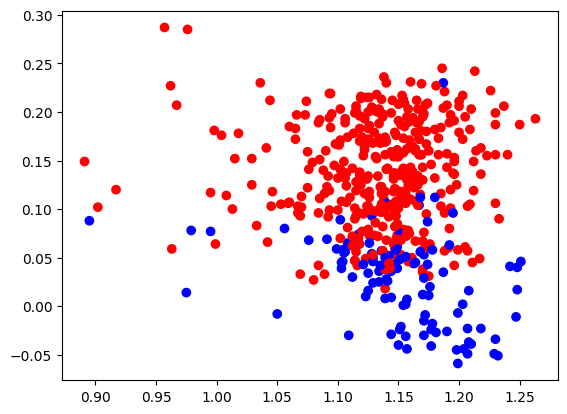

In [900]:
df['u-g'] = df['umag'] - df['gmag']
df['g-r'] = df['gmag'] - df['rmag']
df['r-i'] = df['rmag'] - df['imag']
df['i-z'] = df['imag'] - df['zmag']

plt.scatter(df['u-g'], df['g-r'], c=np.where(df['Type'] == b'ab', 'r', 'b'))

# Algorithm 3.1 The first algorithm that computes a (1 + ϵ)-approximation to MEB(A).

In [901]:
def phi(u, A):
    return sum(u[i] * np.dot(A[i].T, A[i]) for i in range(len(u))) - np.dot(sum(u[i] * A[i] for i in range(len(u))).T, sum(u[i] * A[i] for i in range(len(u))))

def create_unit_vector(idx, length):
    vec = np.zeros(length)
    vec[idx] = 1
    return vec

In [902]:
import numpy as np
import pandas as pd
import time

def frank_wolfe_alg_MEB(epsilon, A):
    """
    Frank-Wolfe algorithm for the minimum enclosing ball problem.
    """

    start_time = time.time()

    # Compute distances and indices
    distances_to_a_1 = np.linalg.norm(A - A[0], axis=1)**2 # ||a_i - a_1||^2
    alpha = np.argmax(distances_to_a_1)
    distances_to_a_alpha = np.linalg.norm(A - A[alpha], axis=1)**2 if alpha is not None else np.zeros(len(A)) # ||a_i - a_α||^2
    beta = np.argmax(distances_to_a_alpha)
    #print(f"First Value in A: {A[0]}")
    #print(f"Initial values for Alpha and Beta: {(A[alpha], A[beta])}")
    # Initialize u, chi, c
    u = np.zeros(len(A))
    u[alpha], u[beta] = 0.5, 0.5

    chi = [A[alpha], A[beta]]
    c = u @ A
    c_hist = [c]
    mu = phi(u, A)
    kappa_idxs = []

    # Main iteration loop
    distances_to_c = np.linalg.norm(A - c, axis=1)**2
    kappa = np.argmax(distances_to_c)
    delta = (distances_to_c[kappa] / mu) - 1.0
    #print(f"Initial Delta: {delta}")
    #print(f"Initial Mu: {mu}")
    k = 0
    while delta > ((1 + epsilon)**2) - 1.0 and k < 1000:
        lambd = delta / (2 * (1.0 + delta))
        k += 1
        u = (1 - lambd) * u + lambd * create_unit_vector(kappa, len(A))
        c = (1 - lambd) * c + lambd * A[kappa]
        c_hist.append(c)
        if kappa not in kappa_idxs:
            kappa_idxs.append(kappa)
            chi.append(A[kappa])
        #print(f"Kappa at iteration {k}: {A[kappa]}")
        #print(f"Delta at iteration {k}: {delta}")
        mu = phi(u, A)
        distances_to_c = np.linalg.norm(A - c, axis=1)**2
        kappa = np.argmax(distances_to_c)
        delta = (distances_to_c[kappa] / mu) - 1

    timer = time.time() - start_time
    print("Center:", c)
    print("Radius:", np.sqrt((1 + delta) * mu))
    print("Iterations:", k)
    print("CPU time:", timer)
    print("Core Set Size:", len(chi))

    return c, np.sqrt((1 + delta) * mu), k, chi, timer


Center: [1.07753704 0.16668496]
Radius: 0.18737290666941106
Iterations: 1000
CPU time: 1.0524568557739258
Core Set Size: 4


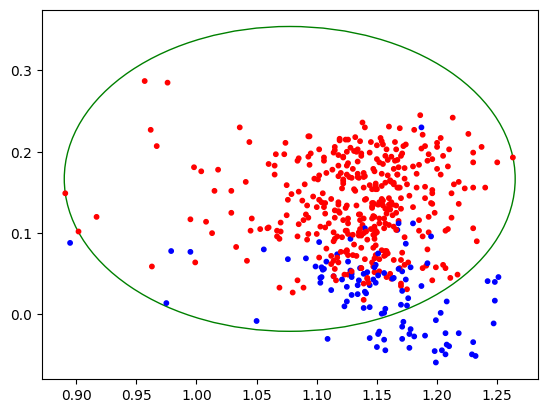

In [903]:
A = df[df['Type'] == b'ab'][['u-g', 'g-r']].values

c, r, k, chi, timer = frank_wolfe_alg_MEB(0.0001, A)

circle = plt.Circle(tuple(c), r, color='g', fill=False)

ax = plt.gca()
ax.cla()

ax.add_patch(circle)

plt.scatter(df['u-g'], df['g-r'], c=np.where(df['Type'] == b'ab', 'r', 'b'), s=10)

# SSDS Quasar-Galaxy Classification

In [904]:
# open the pulsar dataset
qso_g_df = pd.read_csv('datasets/qso_galaxy.csv')

# drop the rows with missing values
qso_g_df = qso_g_df.dropna()
qso_g_df.rename(columns={'class': 'type'}, inplace=True)

# drop the outliers
qso_g_df = qso_g_df[qso_g_df['u'] > -5000]

display(qso_g_df.head())

,u,g,r,i,z,type
0,22.50961,21.00053,20.37122,20.14358,19.96108,GALAXY
1,24.02219,20.57676,18.59011,17.91181,17.46025,GALAXY
2,23.19019,20.20138,18.48589,17.82312,17.40056,GALAXY
3,19.72725,18.24207,17.65169,17.28164,17.07238,GALAXY
4,22.57040,20.07732,18.35674,17.77874,17.37334,GALAXY


In [905]:
qso_g_df['u-g'] = qso_g_df['u'] - qso_g_df['g']
qso_g_df['g-r'] = qso_g_df['g'] - qso_g_df['r']
qso_g_df['r-i'] = qso_g_df['r'] - qso_g_df['i']
qso_g_df['i-z'] = qso_g_df['i'] - qso_g_df['z']

pred_columns = ['u-g', 'g-r', 'r-i', 'i-z']

#plt.scatter(qso_g_df['u-g'], qso_g_df['g-r'], c=np.where(qso_g_df['class'] == 'GALAXY', 'r', 'b'), s=10)

In [906]:
train_set = qso_g_df[qso_g_df['type'] == 'GALAXY']

c_qso_g, r_qso_g, k_qso_g, chi_qso_g, timer_qso_g = frank_wolfe_alg_MEB(0.001, train_set[pred_columns].iloc[:len(train_set)//2].values)

Center: [ 2.43000308  1.84516919 -2.2888295   3.58083261]
Radius: 15.859336548661279
Iterations: 11
CPU time: 0.6005220413208008
Core Set Size: 4


In [907]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm(qso_g_df[pred_columns] - c_qso_g, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
qso_g_df['InsideBall'] = distances < r_qso_g

In [908]:
positive_class = 'GALAXY'
negative_class = 'QSO'

measure_accuracy(negative_class, positive_class, qso_g_df)

,Metric,Count
0,True Positive (TP),42848.000000
1,False Negative (FN),3.000000
2,True Negative (TN),0.000000
3,False Positive (FP),7148.000000
4,Precision,0.857029
5,Recall,0.999930
6,F1 Score,0.922981


# Pulsar Dataset

In [909]:
# open the pulsar dataset
pulsar_df = pd.read_csv('datasets/pulsar_data_train.csv')

pulsar_df = pulsar_df.dropna()

pulsar_df.rename(columns={'target_class': 'type'}, inplace=True)

space_columns = pulsar_df.columns[:-1]  # Exclude the last column

# display the first 5 rows
display(pulsar_df.head())

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,type
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0


In [910]:
train_set = pulsar_df[pulsar_df['type'] == 0.0]


c_pulsar, r_pulsar, k_pulsar, chi_pulsar, time_pulsar = frank_wolfe_alg_MEB(0, train_set[space_columns].iloc[:len(train_set)//2].values)

Center: [ 1.20654428e+02  5.46945390e+01 -1.47004837e-01  1.62046118e+00
  8.46684975e+01  4.34077465e+01  1.68202223e+01  5.92939517e+02]
Radius: 605.8142091726877
Iterations: 1000
CPU time: 9.85975193977356
Core Set Size: 6


In [911]:
# Select columns representing the 9-dimensional space
space_columns = pulsar_df.columns[:-1]  # Exclude the last column

# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm(pulsar_df[space_columns] - c_pulsar, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
pulsar_df['InsideBall'] = distances < r_pulsar

In [912]:
measure_accuracy(1.0, 0.0, pulsar_df)

,Metric,Count
0,True Positive (TP),8423.000000
1,False Negative (FN),0.000000
2,True Negative (TN),71.000000
3,False Positive (FP),779.000000
4,Precision,0.915344
5,Recall,1.000000
6,F1 Score,0.955801


# Red Dwarfs vs. White Dwarf

In [913]:
red_dwarfs = pd.read_csv('datasets/red_dwarfs.csv')
white_dwarfs = pd.read_csv('datasets/white_dwarfs.csv')

red_dwarfs['type'] = 'red'
white_dwarfs['type'] = 'white'



red_dwarfs = red_dwarfs[red_dwarfs['subclass'].str.startswith('K') | red_dwarfs['subclass'].str.startswith('M')]
white_dwarfs = white_dwarfs[white_dwarfs['subclass'] == 'WD']

red_dwarfs = red_dwarfs.iloc[:2000]
white_dwarfs = white_dwarfs.iloc[:2000]

dwarfs = pd.concat([red_dwarfs, white_dwarfs], ignore_index=True)

dwarfs = dwarfs.dropna()

#dwarfs = dwarfs.sample(frac=1).reset_index(drop=True)

display(dwarfs.head())

,spectroFlux_u,spectroFlux_g,spectroFlux_r,spectroFlux_i,spectroFlux_z,class,subclass,type
0,0.690362,2.639864,6.609772,9.040903,10.89239,STAR,K1,red
1,1.696024,5.127242,11.380340,15.288570,18.13893,STAR,K1,red
2,1.939370,6.556342,14.391160,19.006530,22.24492,STAR,K1,red
3,2.038488,9.414086,19.352240,25.074530,29.21216,STAR,K1,red
4,1.535014,5.447570,11.538370,15.077310,20.65042,STAR,K1,red


In [914]:
dwarfs['u-g'] = dwarfs['spectroFlux_u'] - dwarfs['spectroFlux_g']
dwarfs['g-r'] = dwarfs['spectroFlux_g'] - dwarfs['spectroFlux_r']
dwarfs['r-i'] = dwarfs['spectroFlux_r'] - dwarfs['spectroFlux_i']
dwarfs['i-z'] = dwarfs['spectroFlux_i'] - dwarfs['spectroFlux_z']

pred_columns = ['u-g', 'g-r', 'r-i', 'i-z']

In [931]:
train_set = dwarfs[dwarfs['type'] == "white"]

c_dwarfs, r_dwarfs, k_dwarfs, chi_dwarfs, time_dwarfs = frank_wolfe_alg_MEB(0.1, train_set[pred_columns].iloc[:len(train_set)//2].values)

Center: [115.7612  243.95195 128.0703   78.08645]
Radius: 322.18362241747457
Iterations: 0
CPU time: 0.0032749176025390625
Core Set Size: 2


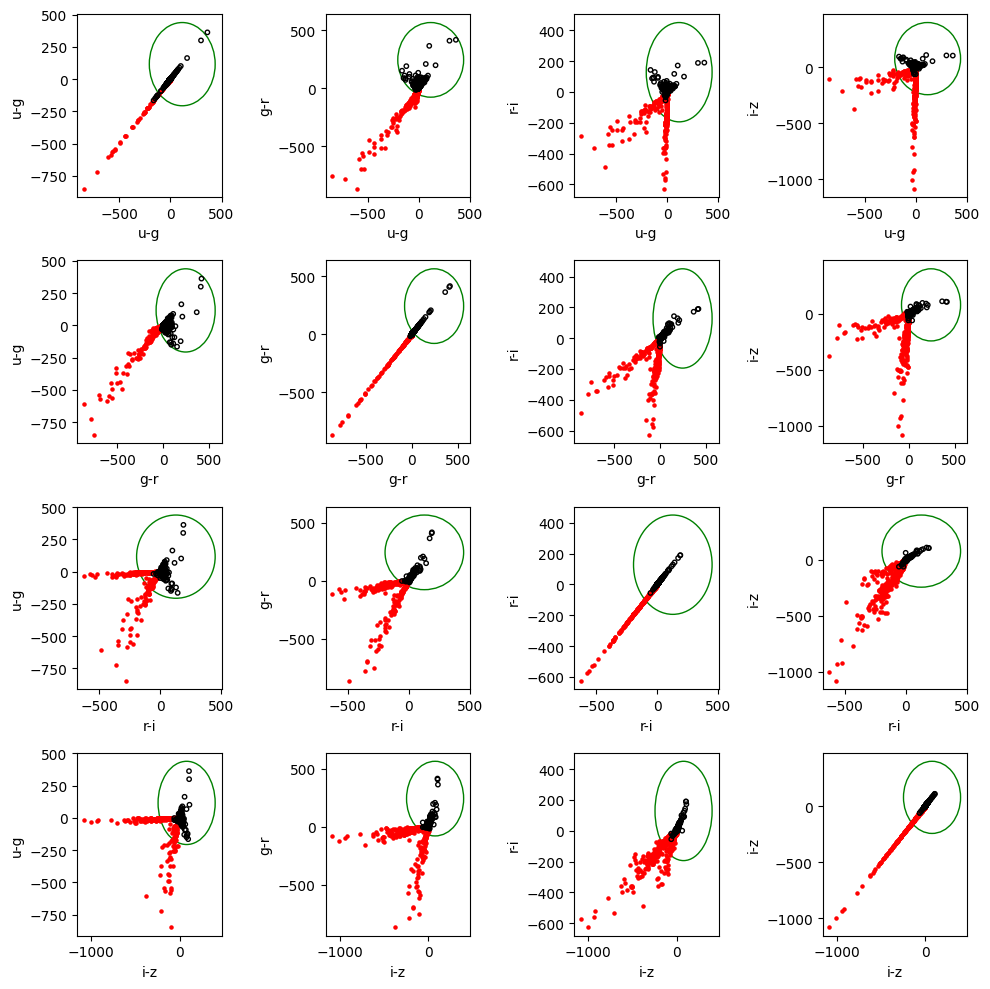

In [932]:
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

variables = ['u-g', 'g-r', 'r-i', 'i-z']

for i in range(4):
    for j in range(4):
        ax = axs[i, j]
        ax.cla()
        circle = plt.Circle(tuple(c_dwarfs[[i,j]]), r_dwarfs, color='g', fill=False, label='MEB')
        ax.add_patch(circle)
        
        ax.scatter(dwarfs[variables[i]][dwarfs['type'] == 'red'], dwarfs[variables[j]][dwarfs['type'] == 'red'], facecolors='r', edgecolors='r', s=5, label='Red Dwarfs')
        ax.scatter(dwarfs[variables[i]][dwarfs['type'] == 'white'], dwarfs[variables[j]][dwarfs['type'] == 'white'], facecolors='none', edgecolors='black', s=10, label='White Dwarfs')
        
        ax.set_xlabel(variables[i])
        ax.set_ylabel(variables[j])
        
        #ax.legend()

plt.tight_layout()
plt.show()

In [933]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm(dwarfs[pred_columns] - c_dwarfs, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
dwarfs['InsideBall'] = distances < r_dwarfs

In [934]:
measure_accuracy("red", "white", dwarfs)

,Metric,Count
0,True Positive (TP),1993.000000
1,False Negative (FN),7.000000
2,True Negative (TN),1567.000000
3,False Positive (FP),395.000000
4,Precision,0.834590
5,Recall,0.996500
6,F1 Score,0.908387
